# Analysis of the scrapped content

Importing packages

In [3]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
  !pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

     |████████████████████████████████| 12.0MB 315kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp37-none-any.whl size=12019125 sha256=6dfbbe4c262565f1731f0078f0558d7ee249c248576ffeab8229e5252fdbbc6a
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [4]:
nlp = spacy.load('en_core_web_sm')

Reading Scrapped Data from the file

In [48]:
df=pd.read_csv('/content/D-Mart_2021-01-15_2021-04-15.csv')

In [49]:
df

,UserScreenName,UserName,Timestamp,Text,Embedded_text,Emojis,Comments,Likes,Retweets,Image link,Tweet URL
0,Saket Jha,@mightyjhayoung,2021-01-15T05:48:55.000Z,no one:\n\nme after getting lost at D-mart:,NaN,NaN,1.0,NaN,8.0,['https://pbs.twimg.com/media/ErwBj2rVQAE5jz1?...,https://twitter.com/mightyjhayoung/status/1349...
1,𝕯𝖗. 𝕬𝖆𝖙𝖒𝖆𝖓𝖎𝖗𝖇𝖍𝖆𝖗 𝕭𝖆𝖙𝖒𝖆𝖓,@Your_Levodopa,2021-01-15T18:43:57.000Z,One notorious case of teenage pregnancy. It wa...,Quote Tweet\nLightskinwonderful\n@lightskintow...,NaN,1.0,NaN,7.0,['https://pbs.twimg.com/profile_images/1349852...,https://twitter.com/Your_Levodopa/status/13501...
2,bank·a·ble,@mbuguanjihia,2021-01-15T09:19:01.000Z,India's largest retailer is Reliance Retail. A...,NaN,NaN,NaN,2.0,3.0,[],https://twitter.com/mbuguanjihia/status/135000...
3,wow someone actually,@lifeofshakes,2021-01-15T16:20:28.000Z,What if D-Mart started an electronics store.?\...,NaN,NaN,NaN,NaN,1.0,[],https://twitter.com/lifeofshakes/status/135011...
4,Prakash,@Prakash29968182,2021-01-15T21:51:38.000Z,India's second-largest retailer is TASMAC. At ...,Quote Tweet\nSangeetha Kandavel\n@sang1983\n ·...,NaN,1.0,1.0,NaN,['https://pbs.twimg.com/profile_images/1348006...,https://twitter.com/Prakash29968182/status/135...
...,...,...,...,...,...,...,...,...,...,...,...
201,M A N O J,@ManojPadwal01,2021-04-09T21:06:45.000Z,D-mart ya kirana store se mahine bhar ka saman...,NaN,💥,1.0,NaN,1.0,[],https://twitter.com/ManojPadwal01/status/13806...
202,Retesh,@_Retesh_Singh,2021-04-10T08:33:37.000Z,"It's often said -\n\n""Spend your life with som...",NaN,🙏 🤭 🤮 🥂 🥳 🎉 😎 💔 🤦 🎸 😬 🔥 🥺 🤯 📷 🙏,NaN,NaN,NaN,[],https://twitter.com/_Retesh_Singh/status/13808...
203,SHO KHAMMAM 3 TOWN,@shokmm3town,2021-04-11T13:02:17.000Z,Conducted Covid Awareness Program at D-Mart Kh...,NaN,NaN,NaN,NaN,4.0,['https://pbs.twimg.com/media/EyseY8sUcAkKIBV?...,https://twitter.com/shokmm3town/status/1381231...
204,Ayush Khandelwal,@ayushk_RMcf,2021-04-11T08:10:24.000Z,"D-Mart lal kothi, Jaipur flouting all covid no...",NaN,NaN,1.0,NaN,NaN,['https://pbs.twimg.com/media/EyrbZExXAAEGDO_?...,https://twitter.com/ayushk_RMcf/status/1381157...


In [50]:
df_text=df['Text']
df_text

0            no one:\n\nme after getting lost at D-mart:
1      One notorious case of teenage pregnancy. It wa...
2      India's largest retailer is Reliance Retail. A...
3      What if D-Mart started an electronics store.?\...
4      India's second-largest retailer is TASMAC. At ...
                             ...                        
201    D-mart ya kirana store se mahine bhar ka saman...
202    It's often said -\n\n"Spend your life with som...
203    Conducted Covid Awareness Program at D-Mart Kh...
204    D-Mart lal kothi, Jaipur flouting all covid no...
205    opposite d-Mart Near beltrodi police station P...
Name: Text, Length: 206, dtype: object

This splits all the sentences up which makes it easier for us to work with


In [51]:

all_sentences = []

for word in df_text:
    all_sentences.append(word)

In [52]:
all_sentences

['no one:\n\nme after getting lost at D-mart:',
 'One notorious case of teenage pregnancy. It was quite a scandal. \n\nAnother less serious case was the day before the school picnic an idiot from my std (not class) tried to shoplift at a D-Mart. They were immediately caught and in the chaos the guards beat them up.',
 "India's largest retailer is Reliance Retail. At a revenue of ₹1,30,566cr ($17.9B) & 10,900 stores. Second-largest retailer is TASMAC. At a revenue of ₹31,157cr ($4.3B) & 7000+ outlets, it comes a distant second but ahead of D-Mart which is at ₹24,930cr ($3.5B) #Simplanations",
 'What if D-Mart started an electronics store.?\nA:  It would be called E-Mart',
 "India's second-largest retailer is TASMAC. At a revenue of ₹31,157cr ($4.3B) and 7000+ outlets, it comes a distant second to Reliance Retail. And ahead of D-Mart which is at ₹24,930cr ($3.5B).\nWhat's interesting though is it retails in only one state in India - Tamil Nadu.",
 'the scenes if D-Mart shareholders start

In [53]:
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

['no', 'one:', 'me', 'after', 'getting', 'lost', 'at', 'D-mart:', 'One', 'notorious', 'case', 'of', 'teenage', 'pregnancy.', 'It', 'was', 'quite', 'a', 'scandal.', 'Another', 'less', 'serious', 'case', 'was', 'the', 'day', 'before', 'the', 'school', 'picnic', 'an', 'idiot', 'from', 'my', 'std', '(not', 'class)', 'tried', 'to', 'shoplift', 'at', 'a', 'D-Mart.', 'They', 'were', 'immediately', 'caught', 'and', 'in', 'the', 'chaos', 'the', 'guards', 'beat', 'them', 'up.', "India's", 'largest', 'retailer', 'is', 'Reliance', 'Retail.', 'At', 'a', 'revenue', 'of', '₹1,30,566cr', '($17.9B)', '&', '10,900', 'stores.', 'Second-largest', 'retailer', 'is', 'TASMAC.', 'At', 'a', 'revenue', 'of', '₹31,157cr', '($4.3B)', '&', '7000+', 'outlets,', 'it', 'comes', 'a', 'distant', 'second', 'but', 'ahead', 'of', 'D-Mart', 'which', 'is', 'at', '₹24,930cr', '($3.5B)', '#Simplanations', 'What', 'if', 'D-Mart', 'started', 'an', 'electronics', 'store.?', 'A:', 'It', 'would', 'be', 'called', 'E-Mart', "India's

Removing Punctuation

In [54]:
lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [55]:
lines2

['no',
 'one',
 'me',
 'after',
 'getting',
 'lost',
 'at',
 'Dmart',
 'One',
 'notorious',
 'case',
 'of',
 'teenage',
 'pregnancy',
 'It',
 'was',
 'quite',
 'a',
 'scandal',
 'Another',
 'less',
 'serious',
 'case',
 'was',
 'the',
 'day',
 'before',
 'the',
 'school',
 'picnic',
 'an',
 'idiot',
 'from',
 'my',
 'std',
 'not',
 'class',
 'tried',
 'to',
 'shoplift',
 'at',
 'a',
 'DMart',
 'They',
 'were',
 'immediately',
 'caught',
 'and',
 'in',
 'the',
 'chaos',
 'the',
 'guards',
 'beat',
 'them',
 'up',
 'Indias',
 'largest',
 'retailer',
 'is',
 'Reliance',
 'Retail',
 'At',
 'a',
 'revenue',
 'of',
 '130566cr',
 '179B',
 '10900',
 'stores',
 'Secondlargest',
 'retailer',
 'is',
 'TASMAC',
 'At',
 'a',
 'revenue',
 'of',
 '31157cr',
 '43B',
 '7000',
 'outlets',
 'it',
 'comes',
 'a',
 'distant',
 'second',
 'but',
 'ahead',
 'of',
 'DMart',
 'which',
 'is',
 'at',
 '24930cr',
 '35B',
 'Simplanations',
 'What',
 'if',
 'DMart',
 'started',
 'an',
 'electronics',
 'store',
 'A'

#This is stemming the words to their root

In [97]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['no',
 'one',
 'me',
 'after',
 'get',
 'lost',
 'at',
 'dmart',
 'one',
 'notori',
 'case',
 'of',
 'teenag',
 'pregnanc',
 'it',
 'was',
 'quit',
 'a',
 'scandal',
 'anoth',
 'less',
 'serious',
 'case',
 'was',
 'the',
 'day',
 'befor',
 'the',
 'school',
 'picnic',
 'an',
 'idiot',
 'from',
 'my',
 'std',
 'not',
 'class',
 'tri',
 'to',
 'shoplift',
 'at',
 'a',
 'dmart',
 'they',
 'were',
 'immedi',
 'caught',
 'and',
 'in',
 'the',
 'chao',
 'the',
 'guard',
 'beat',
 'them',
 'up',
 'india',
 'largest',
 'retail',
 'is',
 'relianc',
 'retail',
 'at',
 'a',
 'revenu',
 'of',
 '130566cr',
 '179b',
 '10900',
 'store',
 'secondlargest',
 'retail',
 'is',
 'tasmac',
 'at',
 'a',
 'revenu',
 'of',
 '31157cr',
 '43b',
 '7000',
 'outlet',
 'it',
 'come',
 'a',
 'distant',
 'second',
 'but',
 'ahead',
 'of',
 'dmart',
 'which',
 'is',
 'at',
 '24930cr',
 '35b',
 'simplan',
 'what',
 'if',
 'dmart',
 'start',
 'an',
 'electron',
 'store',
 'a',
 'it',
 'would',
 'be',
 'call',
 'emart',

#Removing all Stop Words


In [98]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['lost',
 'dmart',
 'notori',
 'case',
 'teenag',
 'pregnanc',
 'quit',
 'scandal',
 'anoth',
 'case',
 'day',
 'befor',
 'school',
 'picnic',
 'idiot',
 'std',
 'class',
 'tri',
 'shoplift',
 'dmart',
 'immedi',
 'caught',
 'chao',
 'guard',
 'beat',
 'india',
 'largest',
 'retail',
 'relianc',
 'retail',
 'revenu',
 '130566cr',
 '179b',
 '10900',
 'store',
 'secondlargest',
 'retail',
 'tasmac',
 'revenu',
 '31157cr',
 '43b',
 '7000',
 'outlet',
 'come',
 'distant',
 'second',
 'ahead',
 'dmart',
 '24930cr',
 '35b',
 'simplan',
 'dmart',
 'start',
 'electron',
 'store',
 'emart',
 'india',
 'secondlargest',
 'retail',
 'tasmac',
 'revenu',
 '31157cr',
 '43b',
 '7000',
 'outlet',
 'come',
 'distant',
 'second',
 'relianc',
 'retail',
 'ahead',
 'dmart',
 '24930cr',
 '35b',
 'interest',
 'retail',
 'onli',
 'state',
 'india',
 'tamil',
 'nadu',
 'scene',
 'dmart',
 'sharehold',
 'start',
 'india',
 'set',
 'busi',
 'success',
 'mix',
 'use',
 'commerci',
 'plaza',
 'opposit',
 'dmart',

In [101]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()


In [104]:
df

dmart             221
damani             34
1001               33
mumbai             30
radhakishan        29
                 ... 
consumermarket      1
natarajan           1
dark                1
lift                1
kandivalicart       1
Name: 0, Length: 1299, dtype: int64

In [60]:
# df=df[1:] # removing the first word friquency

#This will give frequencies of our words


In [85]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor

FreqDist({1: 899,
          2: 193,
          3: 65,
          4: 57,
          5: 27,
          6: 15,
          7: 4,
          8: 3,
          9: 6,
          10: 2,
          11: 1,
          12: 6,
          13: 1,
          14: 2,
          16: 1,
          17: 2,
          18: 2,
          20: 1,
          21: 1,
          24: 3,
          26: 1,
          28: 2,
          29: 1,
          30: 1,
          33: 1,
          34: 1,
          221: 1})

In [96]:
df.shape

(30,)

In [87]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


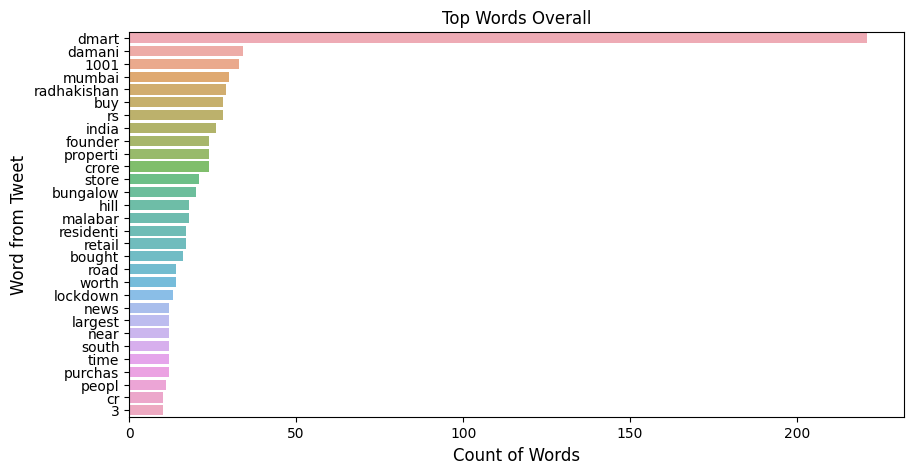

In [88]:
#This is a simple plot that shows the top 30 words being used
#df.plot(30)

df = df[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [89]:
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()


In [90]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [91]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df6 = pd.DataFrame(label, columns = ['Word','Entity'])

df7 = df6.where(df6['Entity'] == 'ORG')

df7 = df7['Word'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


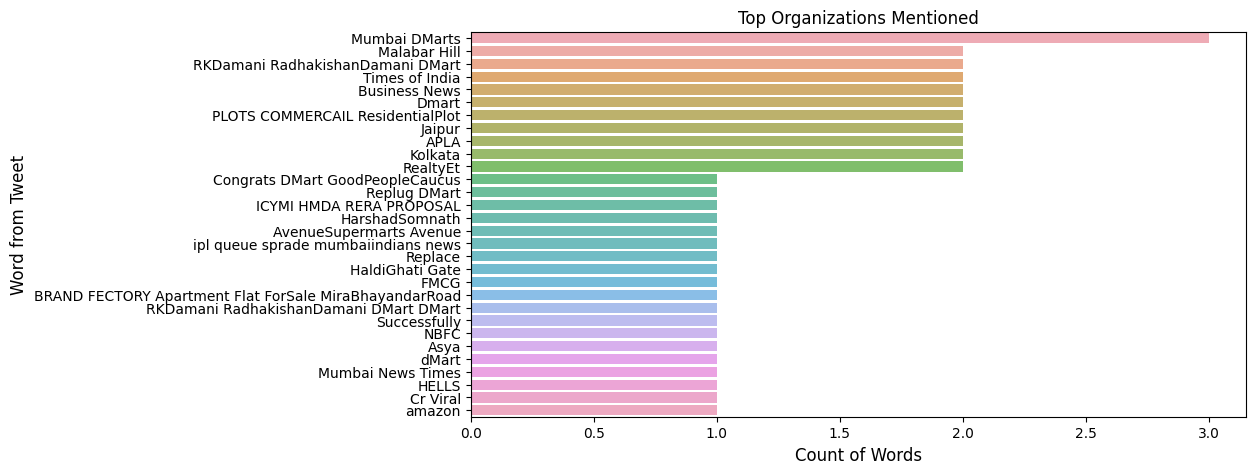

In [92]:
df = df7[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Organizations Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

In [93]:
str1 = " " 
stem2 = str1.join(lines2)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


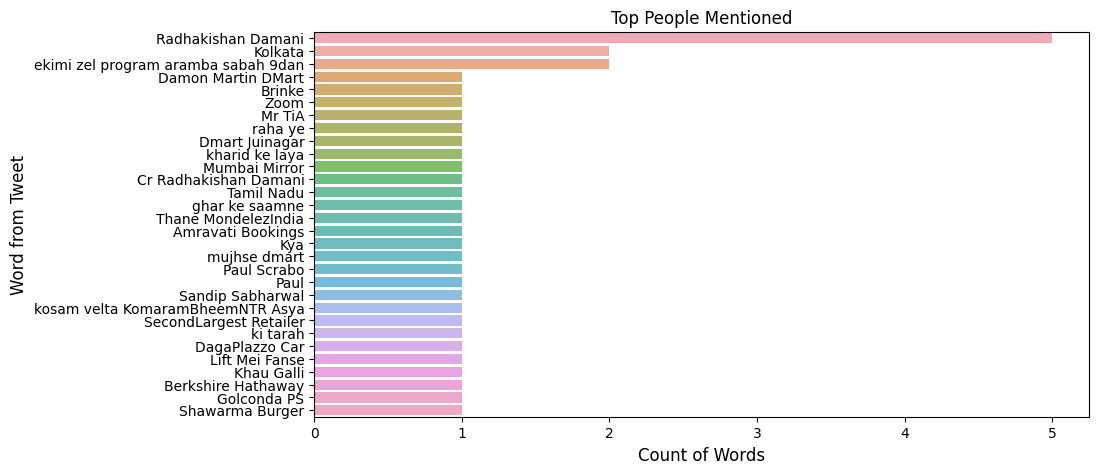

In [94]:
df = df11[:30,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()